# Computer Vision Projects

## Mosaicing and image stiching

In [47]:
import utils
import cv2
import matplotlib.pyplot as plt

We open the reference image and search for the 200 most relevant keypoints.

The number of keypoints with SIFT is 4187


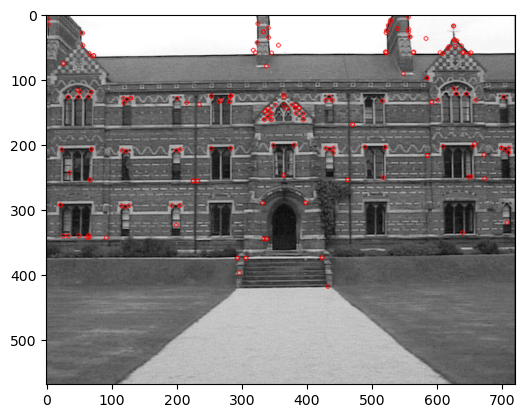

In [48]:
reference_image = cv2.imread('./images/keble_b.jpg', cv2.IMREAD_GRAYSCALE)
kp_ref, d_ref = utils.get_the_N_information(reference_image, 'SIFT')

We take the first image with which we are going to create the panoramic image and search for the 200 most relevant keypoints.

The number of keypoints with SIFT is 4014


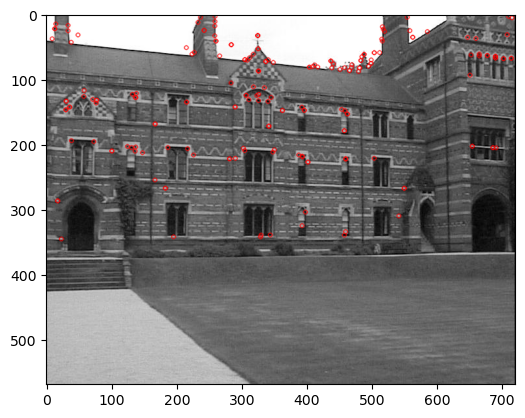

In [49]:
image_right = cv2.imread('./images/keble_c.jpg', cv2.IMREAD_GRAYSCALE)
kp_right, d_right = utils.get_the_N_information(image_right, 'SIFT')

From the 200 correspondences, we carry out brute force matching, then apply the 1NN/2NN ratio test and cross validation to obtain the best matches.

In [50]:
# Create the correspondances
correspondances = utils.create_correspondences(d_right, d_ref, 'SIFT')
print('There are {} correspondances out of 200.'.format(len(correspondances)))

There are 56 correspondances out of 200.


In the following image, we can see how the correspondences match between the reference image, which is on the right, and the first image that we are going to transform into the panorama.

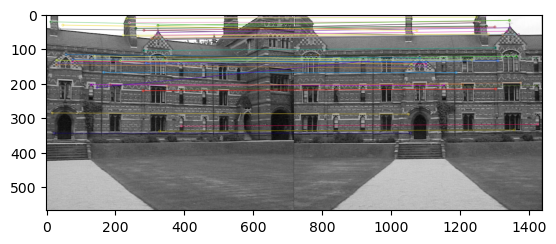

(<matplotlib.image.AxesImage at 0x142864bf0>, None)

In [51]:
# Show the matches
matches = cv2.drawMatches(image_right, kp_right, reference_image, kp_ref, correspondances, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(matches),plt.show()

Now, we will perform the estimation of the homography H using RANSAC. Finally, with this H matrix, we create the panorama.

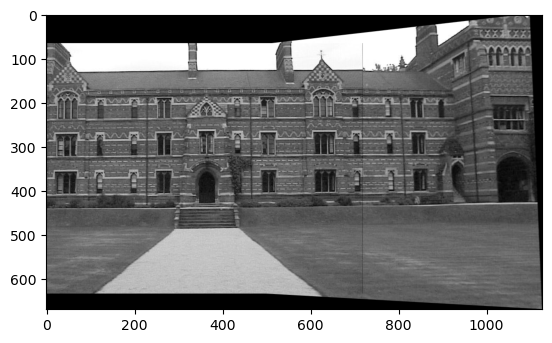

In [52]:
p1, p2 = utils.get_points(correspondances, kp_right, kp_ref)
H, inliners = utils.RANSAC(p1, p2, 10)
first_panorama = utils.create_panorama(reference_image, image_right, H)
plt.imshow(first_panorama, cmap='gray')

Now, we repeat the process with the image on the left.

The number of keypoints with SIFT is 4055


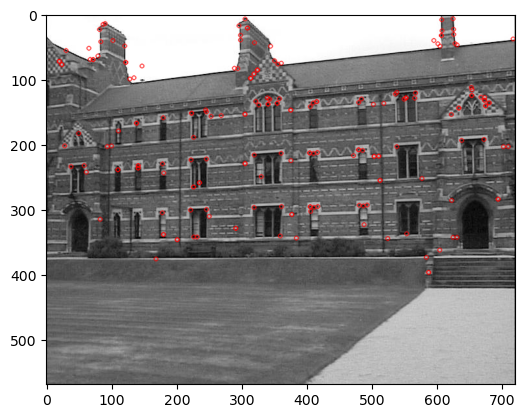

In [53]:
image_left = cv2.imread('./images/keble_a.jpg', cv2.IMREAD_GRAYSCALE)
kp_left, d_left = utils.get_the_N_information(image_left, 'SIFT')

The number of keypoints with SIFT is 6031


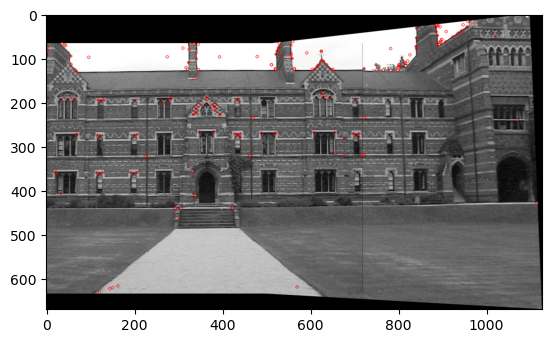

In [54]:
kp_pan, d_pan = utils.get_the_N_information(first_panorama, 'SIFT')

In [55]:
correspondances_2 = utils.create_correspondences(d_left, d_pan, 'SIFT')
print('There are {} correspondances out of 200.'.format(len(correspondances_2)))

There are 39 correspondances out of 200.


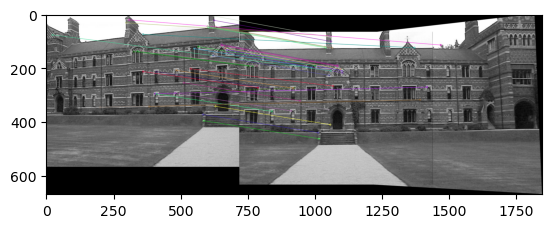

(<matplotlib.image.AxesImage at 0x14217adb0>, None)

In [56]:
matches = cv2.drawMatches(image_left, kp_left, first_panorama, kp_pan, correspondances_2, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(matches),plt.show()

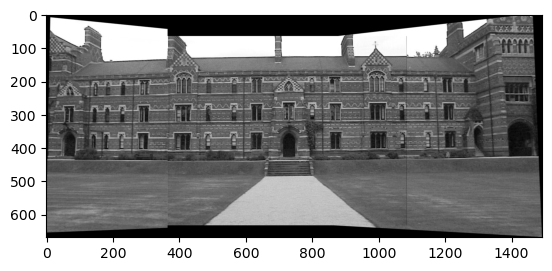

In [57]:
p1_2, p2_2 = utils.get_points(correspondances_2, kp_left, kp_pan)
H_2, inliners_2 = utils.RANSAC(p1_2, p2_2, 300)
final_panorama = utils.create_panorama(first_panorama, image_left, H_2)
plt.imshow(final_panorama, cmap='gray')

Finally, we now open the images in color to have the panoramic image in color.

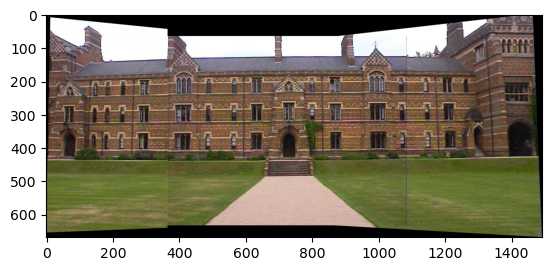

(<matplotlib.image.AxesImage at 0x14419ea50>, None)

In [58]:
img_a = cv2.cvtColor(cv2.imread('images/keble_a.jpg'), cv2.COLOR_BGR2RGB)
img_b = cv2.cvtColor(cv2.imread('images/keble_b.jpg'), cv2.COLOR_BGR2RGB)
img_c = cv2.cvtColor(cv2.imread('images/keble_c.jpg'), cv2.COLOR_BGR2RGB)

first_panorama_color = utils.create_panorama(img_b, img_c, H)
final_panorama_color = utils.create_panorama(first_panorama_color, img_a, H_2)
plt.imshow(final_panorama_color),plt.show()

## Use ORB, which is FAST for the detection and BRIEF for the descriptors.

The number of keypoints with ORB is 500


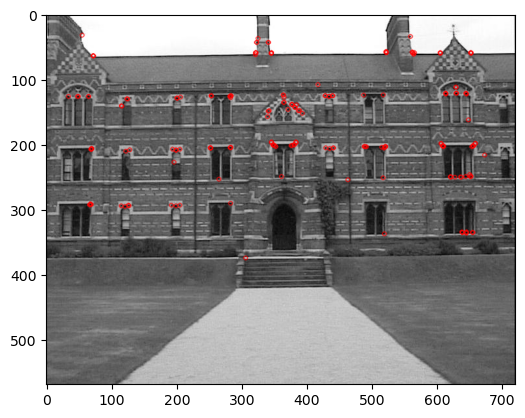

In [59]:
reference_image = cv2.imread('./images/keble_b.jpg', cv2.IMREAD_GRAYSCALE)
kp_ref, d_ref = utils.get_the_N_information(reference_image, 'ORB')

The number of keypoints with ORB is 500


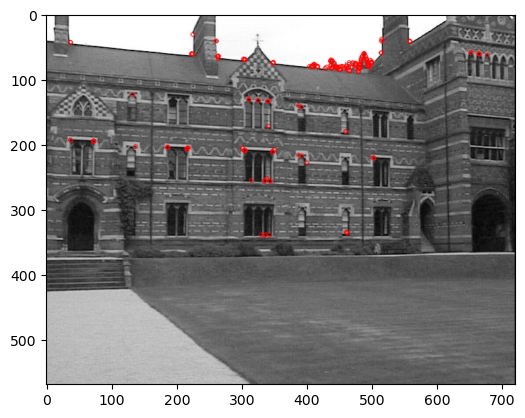

In [60]:
right_image = cv2.imread('./images/keble_c.jpg', cv2.IMREAD_GRAYSCALE)
kp_right, d_right = utils.get_the_N_information(right_image, 'ORB')

In [61]:
import utils
# Create the correspondances
correspondances = utils.create_correspondences(d_right, d_ref, 'ORB')
print('There are {} correspondances out of 200.'.format(len(correspondances)))

There are 15 correspondances out of 200.


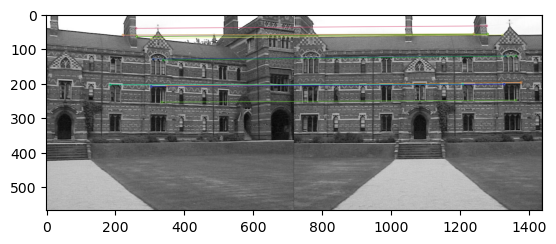

(<matplotlib.image.AxesImage at 0x14419e360>, None)

In [62]:
# Show the matches
matches = cv2.drawMatches(image_right, kp_right, reference_image, kp_ref, correspondances, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(matches),plt.show()

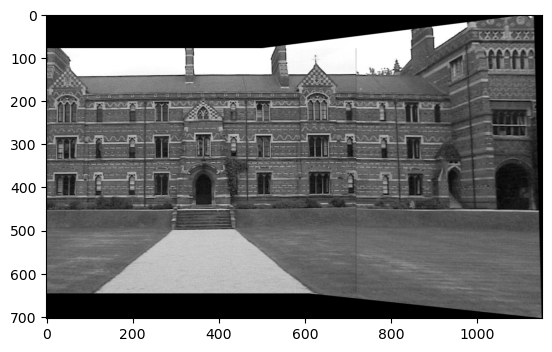

In [63]:
p1, p2 = utils.get_points(correspondances, kp_right, kp_ref)
H, inliners = utils.RANSAC(p1, p2, 300)
first_panorama = utils.create_panorama(reference_image, image_right, H)
plt.imshow(first_panorama, cmap='gray')

The number of keypoints with ORB is 500


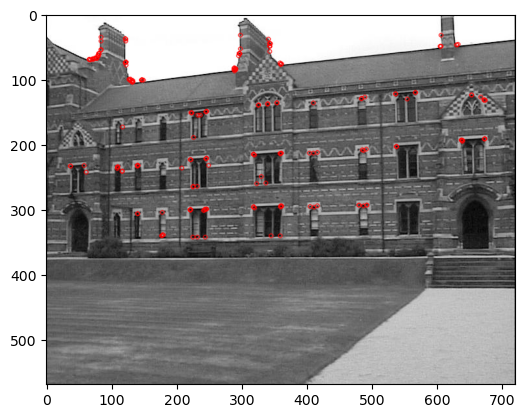

In [64]:
image_left = cv2.imread('./images/keble_a.jpg', cv2.IMREAD_GRAYSCALE)
kp_left, d_left = utils.get_the_N_information(image_left, 'ORB')

The number of keypoints with ORB is 500


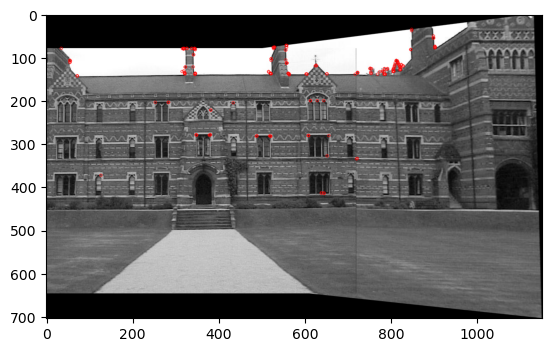

In [65]:
kp_pan, d_pan = utils.get_the_N_information(first_panorama, 'ORB')

In [66]:
correspondances_2 = utils.create_correspondences(d_left, d_pan, 'ORB')
print('There are {} correspondances out of 200.'.format(len(correspondances_2)))

There are 6 correspondances out of 200.


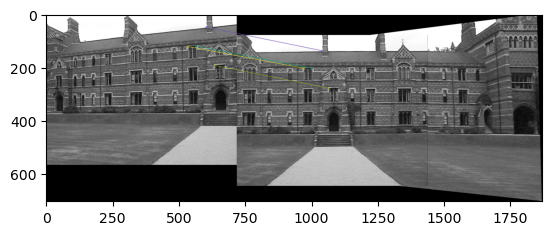

(<matplotlib.image.AxesImage at 0x14281f470>, None)

In [67]:
matches = cv2.drawMatches(image_left, kp_left, first_panorama, kp_pan, correspondances_2, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(matches),plt.show()

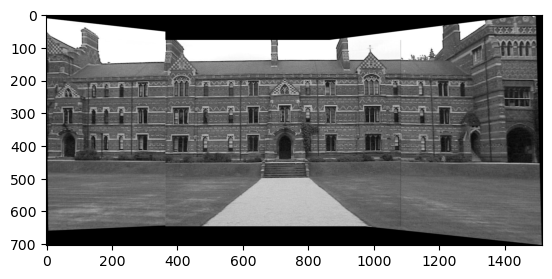

In [71]:
p1_2, p2_2 = utils.get_points(correspondances_2, kp_left, kp_pan)
H_2, inliners_2 = utils.RANSAC(p1_2, p2_2, 300)
final_panorama = utils.create_panorama(first_panorama, image_left, H_2)
plt.imshow(final_panorama, cmap='gray')

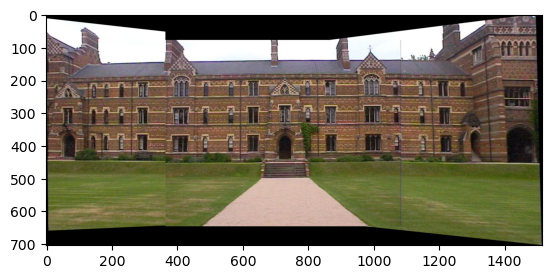

(<matplotlib.image.AxesImage at 0x1427300e0>, None)

In [72]:
img_a = cv2.cvtColor(cv2.imread('images/keble_a.jpg'), cv2.COLOR_BGR2RGB)
img_b = cv2.cvtColor(cv2.imread('images/keble_b.jpg'), cv2.COLOR_BGR2RGB)
img_c = cv2.cvtColor(cv2.imread('images/keble_c.jpg'), cv2.COLOR_BGR2RGB)

first_panorama_color = utils.create_panorama(img_b, img_c, H)
final_panorama_color = utils.create_panorama(first_panorama_color, img_a, H_2)
plt.imshow(final_panorama_color),plt.show()